In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
f = pd.read_csv('../Data/archive (1)/only_medal.csv')
only_medalDF = pd.DataFrame(f)

In [4]:
only_medalDF = only_medalDF.loc[(only_medalDF['Year'] >= 1960) & (only_medalDF['Season'] == "Summer"), :]

In [5]:
only_medalDF.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,GDP,Medal_Won
17,79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,4.010830e+11,1
19,91,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,NaN,1
20,92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,NaN,1
21,105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,1.520270e+11,1
27,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,1.832350e+12,1


In [6]:
identify_team_events = pd.pivot_table(only_medalDF ,index = ['Team', 'Year', 'Event'], columns = 'Medal',
                                      values = 'Medal_Won', aggfunc = 'sum', fill_value = 0).reset_index()

In [7]:
identify_team_events = identify_team_events.loc[identify_team_events['Gold'] > 1, :]
print(identify_team_events)

Medal       Team  Year                            Event  Bronze  Gold  Silver
35     Argentina  2004      Basketball Men's Basketball       0    12       0
36     Argentina  2004          Football Men's Football       0    16       0
42     Argentina  2008            Cycling Men's Madison       0     2       0
43     Argentina  2008          Football Men's Football       0    18       0
51     Argentina  2016              Hockey Men's Hockey       0    18       0
...          ...   ...                              ...     ...   ...     ...
10068        USA  2016    Water Polo Women's Water Polo       0    13       0
10094    Ukraine  1996  Sailing Men's Two Person Dinghy       0     2       0
10158    Ukraine  2008      Fencing Women's Sabre, Team       0     4       0
10187    Ukraine  2012  Rowing Women's Quadruple Sculls       0     4       0
10262   Zimbabwe  1980            Hockey Women's Hockey       0    15       0

[930 rows x 6 columns]


In [8]:
team_sports = identify_team_events['Event'].unique()
print(team_sports)

["Basketball Men's Basketball" "Football Men's Football"
 "Cycling Men's Madison" "Hockey Men's Hockey" 'Sailing Mixed Multihull'
 "Equestrianism Men's Three-Day Event, Team" 'Sailing Mixed 5.5 metres'
 'Sailing Mixed Three Person Keelboat' 'Sailing Mixed Two Person Keelboat'
 "Swimming Men's 4 x 100 metres Medley Relay"
 "Cycling Men's Team Pursuit, 4,000 metres" "Hockey Women's Hockey"
 'Equestrianism Mixed Three-Day Event, Team' "Rowing Men's Coxless Fours"
 "Rowing Men's Double Sculls" "Rowing Women's Coxless Pairs"
 "Tennis Men's Doubles" "Beach Volleyball Women's Beach Volleyball"
 "Sailing Men's Two Person Dinghy" "Sailing Women's Two Person Dinghy"
 "Swimming Men's 4 x 100 metres Freestyle Relay"
 "Swimming Men's 4 x 200 metres Freestyle Relay"
 "Water Polo Women's Water Polo" "Rowing Men's Coxless Pairs"
 "Swimming Women's 4 x 100 metres Freestyle Relay"
 "Swimming Women's 4 x 100 metres Medley Relay"
 "Swimming Women's 4 x 200 metres Freestyle Relay"
 "Canoeing Men's Kayak Fo

In [9]:
# team과 sigle 나누기
team = only_medalDF['Event'].map(lambda x: x in team_sports)
single = [not i for i in team]

medal = only_medalDF['Medal_Won'] == 1

# team과 medal이 모두 True인 경우에만 1을 반환하고, 그렇지 않으면 0
only_medalDF['Team_Event'] = np.where(team & medal, 1, 0)

# single과 medal이 모두 True인 경우에만 1을 반환하고, 그렇지 않으면 0
only_medalDF['Single_Event'] = np.where(single & medal, 1, 0)

only_medalDF['Event_Result'] = only_medalDF['Single_Event'] + only_medalDF['Team_Event']

C:\Users\KDT17\AppData\Local\Temp\ipykernel_16704\1777047103.py:11: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  only_medalDF['Single_Event'] = np.where(single & medal, 1, 0)


In [10]:
only_medalDF.drop('Unnamed: 0', axis=1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,GDP,Medal_Won,Team_Event,Single_Event,Event_Result
17,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,2008,Summer,Beijing,Handball,Handball Women's Handball,Gold,4.010830e+11,1,1,0,1
19,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,1988,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze,NaN,1,1,0,1
20,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,NaN,1,1,0,1
21,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,1996,Summer,Atlanta,Football,Football Women's Football,Bronze,1.520270e+11,1,1,0,1
27,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,1.832350e+12,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39776,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,NaN,1,1,0,1
39779,135553,Galina Ivanovna Zybina (-Fyodorova),F,33.0,168.0,80.0,Russia,URS,1964 Summer,1964,Summer,Tokyo,Athletics,Athletics Women's Shot Put,Bronze,NaN,1,0,1,1
39780,135554,Bogusaw Zych,M,28.0,182.0,82.0,Poland,POL,1980 Summer,1980,Summer,Moskva,Fencing,"Fencing Men's Foil, Team",Bronze,4.638305e+10,1,1,0,1
39781,135563,Olesya Nikolayevna Zykina,F,19.0,171.0,64.0,Russia,RUS,2000 Summer,2000,Summer,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze,1.959060e+11,1,1,0,1


In [11]:
# 새로운 컬럼 Real_Medal 만들기 (기본값 0)
only_medalDF["Real_Medal"] = 0

# 팀 경기(Team_Event == 1)에서 같은 Team, Year, Event 기준으로 첫 번째 선수만 Real_Medal = 1
only_medalDF.loc[only_medalDF.duplicated(subset=["Team", "Year", "Event"], keep="first") == False, "Real_Medal"] = only_medalDF["Medal_Won"]

# 개인전(Single_Event == 1)은 기존 Medal_Won 값 유지
only_medalDF.loc[only_medalDF["Single_Event"] == 1, "Real_Medal"] = only_medalDF["Medal_Won"]

# 결과 확인
only_medalDF.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,...,City,Sport,Event,Medal,GDP,Medal_Won,Team_Event,Single_Event,Event_Result,Real_Medal
17,79,21,Ragnhild Margrethe Aamodt,F,27.0,163.0,NaN,Norway,NOR,2008 Summer,...,Beijing,Handball,Handball Women's Handball,Gold,4.010830e+11,1,1,0,1,1
19,91,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,...,Seoul,Hockey,Hockey Women's Hockey,Bronze,NaN,1,1,0,1,1
20,92,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,...,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver,NaN,1,1,0,1,1
21,105,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,...,Atlanta,Football,Football Women's Football,Bronze,1.520270e+11,1,1,0,1,1
27,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,...,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze,1.832350e+12,1,1,0,1,1


In [12]:
len(only_medalDF[(only_medalDF['Team_Event']==1)])-len(only_medalDF[(only_medalDF['Real_Medal']==1)])
only_medalDF[(only_medalDF['Team_Event']==1)&(only_medalDF['Year']==2012)&(only_medalDF['Team']=='France')&(only_medalDF['Sport']=='Handball')]
# only_medalDF[only_medalDF['Medal_Won']==0]
only_medalDF[(only_medalDF['Team']=='USA')&(only_medalDF['Year']==2008)&(only_medalDF['Sport']=='Swimming')&(only_medalDF['Sex']=='M')&(only_medalDF['Name']=='Michael Fred Phelps, II')]

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,...,City,Sport,Event,Medal,GDP,Medal_Won,Team_Event,Single_Event,Event_Result,Real_Medal
27218,187896,94406,"Michael Fred Phelps, II",M,23.0,193.0,91.0,USA,USA,2008 Summer,...,Beijing,Swimming,Swimming Men's 200 metres Freestyle,Gold,1.447760e+13,1,0,1,1,1
27219,187897,94406,"Michael Fred Phelps, II",M,23.0,193.0,91.0,USA,USA,2008 Summer,...,Beijing,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold,1.447760e+13,1,1,0,1,0
27220,187898,94406,"Michael Fred Phelps, II",M,23.0,193.0,91.0,USA,USA,2008 Summer,...,Beijing,Swimming,Swimming Men's 4 x 200 metres Freestyle Relay,Gold,1.447760e+13,1,1,0,1,0
27221,187899,94406,"Michael Fred Phelps, II",M,23.0,193.0,91.0,USA,USA,2008 Summer,...,Beijing,Swimming,Swimming Men's 100 metres Butterfly,Gold,1.447760e+13,1,0,1,1,1
27222,187900,94406,"Michael Fred Phelps, II",M,23.0,193.0,91.0,USA,USA,2008 Summer,...,Beijing,Swimming,Swimming Men's 200 metres Butterfly,Gold,1.447760e+13,1,0,1,1,1
27223,187901,94406,"Michael Fred Phelps, II",M,23.0,193.0,91.0,USA,USA,2008 Summer,...,Beijing,Swimming,Swimming Men's 200 metres Individual Medley,Gold,1.447760e+13,1,0,1,1,1
27224,187902,94406,"Michael Fred Phelps, II",M,23.0,193.0,91.0,USA,USA,2008 Summer,...,Beijing,Swimming,Swimming Men's 400 metres Individual Medley,Gold,1.447760e+13,1,0,1,1,1
27225,187903,94406,"Michael Fred Phelps, II",M,23.0,193.0,91.0,USA,USA,2008 Summer,...,Beijing,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold,1.447760e+13,1,1,0,1,0


In [13]:
# 그룹화 후 합산
medal_total = only_medalDF.groupby(['Name', 'Sex', 'Year', 'Team', 'Medal', 'Sport', 'GDP'])[['Real_Medal', 'Event_Result']].agg('sum').reset_index()

# Event_Result이 0인 경우 대비하여 계산 (ZeroDivisionError 방지)
medal_total['Medal_Won_Corrected'] = medal_total['Real_Medal'] / medal_total['Event_Result']

# NaN 발생 방지
medal_total['Medal_Won_Corrected'] = medal_total['Medal_Won_Corrected'].fillna(0)

# 결과 확인
medal_total.head()


,Name,Sex,Year,Team,Medal,Sport,GDP,Real_Medal,Event_Result,Medal_Won_Corrected
0,"A. Joshua ""Josh"" West",M,2008,UK,Silver,Rowing,3.074360e+12,0,1,0.0
1,Aaron Brown,M,2016,Canada,Bronze,Athletics,1.552810e+12,0,1,0.0
2,Aaron Gate,M,2012,New Zealand,Bronze,Cycling,1.684620e+11,0,1,0.0
3,Aaron John McIntosh,M,2000,New Zealand,Bronze,Sailing,5.876174e+10,1,1,1.0
4,Aaron Nguimbat,M,2000,Cameroon,Gold,Football,1.119838e+10,0,1,0.0


In [14]:
# 그룹화 및 Real_Medal 합산
medal_total = only_medalDF.groupby(['Name', 'Sex', 'Year', 'Team', 'Medal', 'Sport','GDP'])[['Real_Medal', 'Event_Result']].agg('sum').reset_index()

# Medal_Won_Corrected 계산
medal_total['Medal_Won_Corrected'] = medal_total['Real_Medal'] / medal_total['Event_Result']

# NaN 발생 방지 (FutureWarning 해결)
medal_total['Medal_Won_Corrected'] = medal_total['Medal_Won_Corrected'].fillna(0)

# 결과 확인
medal_total[(medal_total['Real_Medal']>4)]

,Name,Sex,Year,Team,Medal,Sport,GDP,Real_Medal,Event_Result,Medal_Won_Corrected
9532,"Michael Fred Phelps, II",M,2008,USA,Gold,Swimming,1.447760e+13,5,8,0.625


In [15]:
medal_total[medal_total['Real_Medal']>2]

,Name,Sex,Year,Team,Medal,Sport,GDP,Real_Medal,Event_Result,Medal_Won_Corrected
347,Aleksey Yuryevich Nemov,M,1996,Russia,Bronze,Gymnastics,3.955310e+11,3,3,1.000000
2055,"Charles Buchanan ""Charlie"" Hickcox",M,1968,USA,Gold,Swimming,8.617000e+11,3,3,1.000000
2257,"Christopher Andrew ""Chris"" Hoy",M,2008,UK,Gold,Cycling,3.074360e+12,3,3,1.000000
2930,"Deborah Elizabeth ""Debbie"" Meyer (-Weber)",F,1968,USA,Gold,Swimming,8.617000e+11,3,3,1.000000
4068,"Frederick Carlton ""Carl"" Lewis",M,1984,USA,Gold,Athletics,3.638140e+12,3,4,0.750000
5785,Janet Beth Evans,F,1988,USA,Gold,Swimming,4.870220e+12,3,3,1.000000
6994,"Kathleen Genevieve ""Katie"" Ledecky",F,2016,USA,Gold,Swimming,1.812070e+13,3,4,0.750000
7021,Katinka Hossz,F,2016,Hungary,Gold,Swimming,1.228790e+11,3,3,1.000000
7563,Krisztina Egerszegi,F,1992,Hungary,Gold,Swimming,3.474851e+10,3,3,1.000000
8049,Li Ning,M,1984,China,Gold,Gymnastics,2.306870e+11,3,3,1.000000


In [16]:
# medal_total['Medal_Won_Corrected'] = medal_total['Medal_Won_Corrected'].astype(int)
# 회귀계수를 구하기 위해서는 int로 바꾸면 값이 손실된다.

In [17]:
# medal_total['Real_Medal'].unique()
athletes_medal_0302 = medal_total.copy

In [18]:
medal_total.to_csv('./athletes_medal_0302.csv')

In [19]:
# 국가별 메달 합산
medal_by_country = medal_total.groupby(['Year','Team','Medal','GDP'])[['Real_Medal']].sum().reset_index()

# 결과 확인
medal_by_country.head()
medal_by_country[medal_by_country['Team']=='Australia']

,Year,Team,Medal,GDP,Real_Medal
1,1964,Australia,Bronze,2.152761e+10,10
2,1964,Australia,Gold,2.152761e+10,6
3,1964,Australia,Silver,2.152761e+10,2
59,1968,Australia,Bronze,3.042110e+10,5
60,1968,Australia,Gold,3.042110e+10,5
61,1968,Australia,Silver,3.042110e+10,7
127,1972,Australia,Bronze,4.518311e+10,2
128,1972,Australia,Gold,4.518311e+10,8
129,1972,Australia,Silver,4.518311e+10,7
195,1976,Australia,Bronze,9.722655e+10,4


In [20]:
# 국가별 메달 합산
#medal_by_country_total = medal_by_country.groupby(['Team','Year'])[['Real_Medal']].sum().reset_index()
medal_by_country_total = medal_total.groupby(['Year','Team','GDP'])[['Real_Medal']].sum().reset_index()

# 결과 확인
#medal_by_country_total.columns=['Team', 'Year', 'Medal_Total']

In [21]:
individual_country = {'Year':[1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016],
					  'Country_host':['Italy','Japan','Meixo','Germany','Canada','Russia','USA','South Korea','Spain','USA','Australia','Greece','China','England','Brazil']}

individual_country_DF = pd.DataFrame(individual_country)

In [22]:
individual_country_DF

,Year,Country_host
0,1960,Italy
1,1964,Japan
2,1968,Meixo
3,1972,Germany
4,1976,Canada
5,1980,Russia
6,1984,USA
7,1988,South Korea
8,1992,Spain
9,1996,USA


In [23]:
# 개최국 합치는거

In [24]:
merged_df = pd.merge(medal_by_country_total, individual_country_DF, on='Year', how='left')

In [25]:
#merged_df.to_csv('medal_Real_total_wiht_Host.csv')

In [26]:
merged_df.columns

Index(['Year', 'Team', 'GDP', 'Real_Medal', 'Country_host'], dtype='object')

In [27]:
merged_df['Team'].unique()

array(['Argentina', 'Australia', 'Belgium', 'Brazil', 'Canada', 'Cuba',
       'Ethiopia', 'Finland', 'France', 'Ghana', 'Hungary', 'India',
       'Ireland', 'Italy', 'Japan', 'Kenya', 'Mexico', 'New Zealand',
       'Pakistan', 'Poland', 'Romania', 'South Korea', 'Sweden',
       'Trinidad', 'Tunisia', 'Turkey', 'UK', 'USA', 'Austria',
       'Cameroon', 'Jamaica', 'Norway', 'Uganda', 'Venezuela', 'Colombia',
       'North Korea', 'Spain', 'Thailand', 'Guyana', 'China',
       'Dominican Republic', 'Egypt', 'Iceland', 'Ivory Coast', 'Morocco',
       'Peru', 'Syria', 'Chile', 'Djibouti', 'Senegal', 'Suriname',
       'Estonia', 'Israel', 'Lithuania', 'Namibia', 'Qatar', 'Armenia',
       'Azerbaijan', 'Belarus', 'Burundi', 'Czech Republic', 'Ecuador',
       'Georgia', 'Kazakhstan', 'Moldova', 'Mozambique', 'Russia',
       'Slovakia', 'Ukraine', 'Uzbekistan', 'Kyrgyzstan', 'Macedonia',
       'Eritrea', 'Afghanistan', 'Panama', 'Serbia', 'Singapore',
       'Tajikistan', 'Bahrain', 

In [28]:
merged_df[merged_df['Team'] == 'Germeny']

,Year,Team,GDP,Real_Medal,Country_host


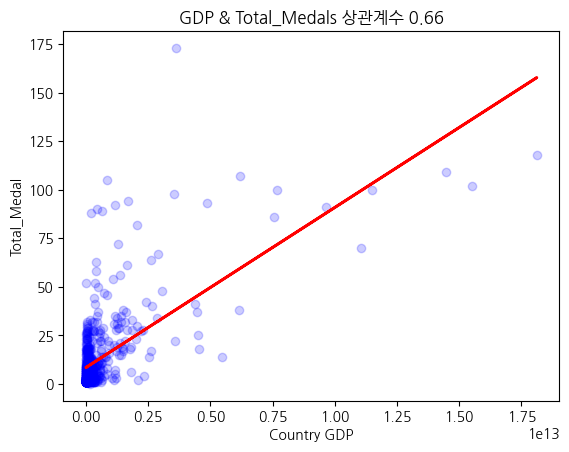

In [29]:
x = merged_df['GDP']
y = merged_df['Real_Medal']
plt.scatter(x,y, alpha=0.2, color='b')

# 선형 회귀선 계산 # 1차 다항식 (직선) 피팅
slope, intercept = np.polyfit(x,y,1)


# 회쉬선 추가
plt.plot(x,slope*x + intercept, color='red',linewidth=2, label='Regression Line')


a = merged_df[['GDP','Real_Medal']].corr()
plt.title(f'GDP & Total_Medals 상관계수 {a.iloc[0,1]:.2f}')

plt.xlabel('Country GDP')
plt.ylabel('Total_Medal')
plt.show()


# 상위 GDP 10개국 메달 비교

In [30]:
merged_df

,Year,Team,GDP,Real_Medal,Country_host
0,1964,Argentina,1.827212e+10,1,Japan
1,1964,Australia,2.152761e+10,18,Japan
2,1964,Belgium,1.426002e+10,3,Japan
3,1964,Brazil,2.302148e+10,1,Japan
4,1964,Canada,4.465717e+10,4,Japan
...,...,...,...,...,...
591,2016,UK,2.885570e+12,67,Brazil
592,2016,USA,1.812070e+13,118,Brazil
593,2016,Ukraine,9.103096e+10,11,Brazil
594,2016,Uzbekistan,6.690380e+10,13,Brazil


In [31]:
# 2016, 2012 , 2008
# 매달 평균 , GDP 평균

GDP_Veiw_Data2016   =merged_df[merged_df['Year'] == 2016].sort_values('GDP', ascending=False)
GDP_Veiw_Data2012   =merged_df[merged_df['Year'] == 2012].sort_values('GDP', ascending=False)
GDP_Veiw_Data2008   =merged_df[merged_df['Year'] == 2008].sort_values('GDP', ascending=False)

                 GDP  Real_Medal
GDP         1.000000    0.889796
Real_Medal  0.889796    1.000000
                 GDP  Real_Medal
GDP         1.000000    0.690786
Real_Medal  0.690786    1.000000
                 GDP  Real_Medal
GDP         1.000000    0.668016
Real_Medal  0.668016    1.000000


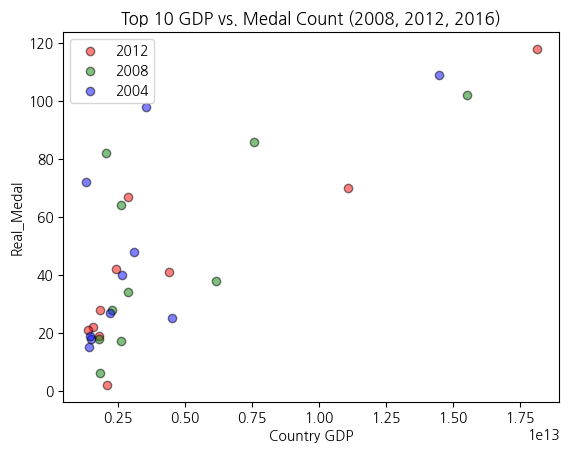

In [32]:
plt.scatter(GDP_Veiw_Data2016.head(10)['GDP'], GDP_Veiw_Data2016.head(10)['Real_Medal'], 
            alpha=0.5, color='r', edgecolors='k', label="2012")
plt.scatter(GDP_Veiw_Data2012.head(10)['GDP'], GDP_Veiw_Data2012.head(10)['Real_Medal'], 
            alpha=0.5, color='g', edgecolors='k', label="2008")
plt.scatter(GDP_Veiw_Data2008.head(10)['GDP'], GDP_Veiw_Data2008.head(10)['Real_Medal'], 
            alpha=0.5, color='b', edgecolors='k', label="2004")



a1 = GDP_Veiw_Data2016[['GDP','Real_Medal']].head(10).corr()
print(a1)

a2 = GDP_Veiw_Data2012[['GDP','Real_Medal']].head(10).corr()
print(a2)

a3 = GDP_Veiw_Data2008[['GDP','Real_Medal']].head(10).corr()
print(a3)


# X축과 Y축 라벨 추가
plt.xlabel("Country GDP")
plt.ylabel("Real_Medal")

# 그래프 제목 추가
plt.title("Top 10 GDP vs. Medal Count (2008, 2012, 2016)")

# 범례 추가
plt.legend()

# 그래프 출력
plt.show()


# GDP가 높은 국가 상위 5개 선택

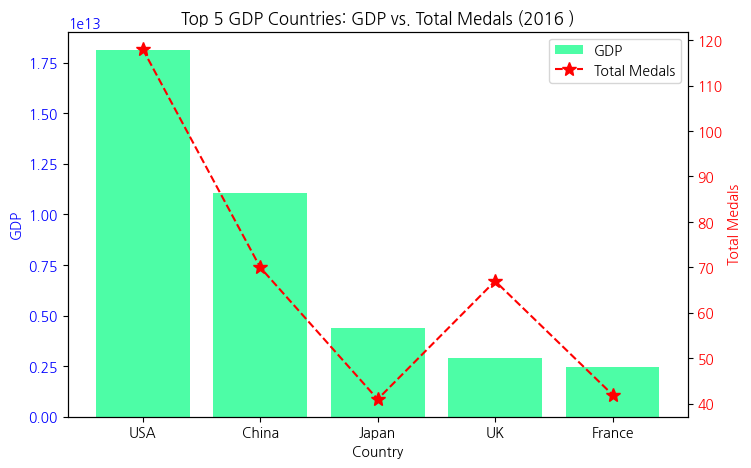

In [47]:
# GDP가 높은 국가 상위 5개 선택
top5_gdp = GDP_Veiw_Data2016.sort_values('GDP', ascending=False).head(5)

# X축 (국가 이름)
x = top5_gdp['Team']
# Y축 (GDP - Bar 그래프용)
y_gdp = top5_gdp['GDP']
# Y축 (총 메달 획득 수 - 산점도용)
y_medals = top5_gdp['Real_Medal']



# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar 그래프 (GDP)
ax1.bar(x, y_gdp, color='#02fd80', alpha=0.7, label="GDP")
ax1.set_xlabel("Country")
ax1.set_ylabel("GDP", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 Y축 설정 (메달 개수)
ax2 = ax1.twinx()  # 새로운 Y축 추가
ax2.plot(x, y_medals, linestyle='--', color='red', marker='*', markersize=10, label="Total Medals")
#ax2.scatter(x, y_medals, color='red', marker='*', s=200, label="Total Medals")
ax2.set_ylabel("Total Medals", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 그래프 제목 및 범례 추가
plt.title("Top 5 GDP Countries: GDP vs. Total Medals (2016 )")

handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc="upper right")
# 그래프 출력
plt.show()


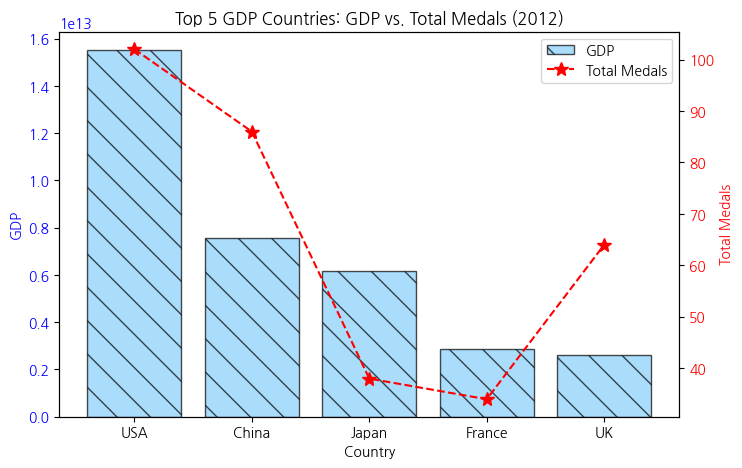

In [34]:
# GDP가 높은 국가 상위 5개 선택
top5_gdp = GDP_Veiw_Data2012.sort_values('GDP', ascending=False).head(5)

# X축 (국가 이름)
x = top5_gdp['Team']
# Y축 (GDP - Bar 그래프용)
y_gdp = top5_gdp['GDP']
# Y축 (총 메달 획득 수 - 산점도용)
y_medals = top5_gdp['Real_Medal']



# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar 그래프 (GDP)
ax1.bar(x, y_gdp, color='lightskyblue',edgecolor='black', hatch='\\', alpha=0.7, label="GDP")
ax1.set_xlabel("Country")
ax1.set_ylabel("GDP", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 Y축 설정 (메달 개수)
ax2 = ax1.twinx()  # 새로운 Y축 추가
ax2.plot(x, y_medals, linestyle='--', color='red', marker='*', markersize=10, label="Total Medals")
#ax2.scatter(x, y_medals, color='red', marker='*', s=200, label="Total Medals")
ax2.set_ylabel("Total Medals", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 그래프 제목 및 범례 추가
plt.title("Top 5 GDP Countries: GDP vs. Total Medals (2012)")
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc="upper right")
# 그래프 출력
plt.show()

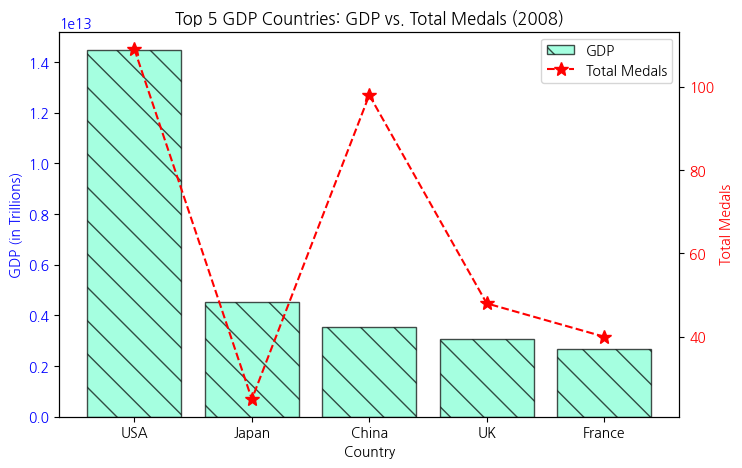

In [48]:
# GDP가 높은 국가 상위 5개 선택
top5_gdp = GDP_Veiw_Data2008.sort_values('GDP', ascending=False).head(5)

# X축 (국가 이름)
x = top5_gdp['Team']
# Y축 (GDP - Bar 그래프용)
y_gdp = top5_gdp['GDP']
# Y축 (총 메달 획득 수 - 산점도용)
y_medals = top5_gdp['Real_Medal']

# 그래프 크기 설정
fig, ax1 = plt.subplots(figsize=(8, 5))

# Bar 그래프 (GDP)
ax1.bar(x, y_gdp, color='aquamarine', edgecolor='black', hatch='\\', alpha=0.7, label="GDP")
ax1.set_xlabel("Country")
ax1.set_ylabel("GDP (in Trillions)", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 Y축 설정 (메달 개수)
ax2 = ax1.twinx()  # 새로운 Y축 추가\
ax2.plot(x, y_medals, linestyle='--', color='red', marker='*', markersize=10, label="Total Medals")
#ax2.scatter(x, y_medals, color='red', marker='*', s=200, label="Total Medals")
ax2.set_ylabel("Total Medals", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 그래프 제목 추가
plt.title("Top 5 GDP Countries: GDP vs. Total Medals (2008)")

#  범례 정보 가져와서 합치기
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
plt.legend(handles1 + handles2, labels1 + labels2, loc="upper right")

# 그래프 출력
plt.show()

In [36]:
merged_df[merged_df['Team']=='Greece']

,Year,Team,GDP,Real_Medal,Country_host


In [37]:
df_host = merged_df[merged_df['Year']>2000]

In [38]:
df_host[df_host['Team']=='Greece']

,Year,Team,GDP,Real_Medal,Country_host


In [39]:
# 20016년 브라질 2012년 영국, 2008년 중국  
home_ground_China_DF = df_host[df_host['Team'] == 'China']
home_ground_UK_DF = df_host[df_host['Team'] == 'UK']
home_ground_Brazil_DF = df_host[df_host['Team'] == 'Brazil']

In [40]:
home_ground_UK_DF

,Year,Team,GDP,Real_Medal,Country_host
409,2004,UK,2.038400e+12,30,Greece
471,2008,UK,3.074360e+12,48,China
531,2012,UK,2.619700e+12,64,England
591,2016,UK,2.885570e+12,67,Brazil


In [41]:
home_ground_China_DF.drop(index=371,inplace=True)
home_ground_China_DF.drop(index=486,inplace=True)

C:\Users\KDT17\AppData\Local\Temp\ipykernel_16704\2377465004.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_ground_China_DF.drop(index=371,inplace=True)
C:\Users\KDT17\AppData\Local\Temp\ipykernel_16704\2377465004.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_ground_China_DF.drop(index=486,inplace=True)


In [42]:
home_ground_China_DF

,Year,Team,GDP,Real_Medal,Country_host
372,2004,China,1.660290e+12,61,Greece
426,2008,China,3.552180e+12,98,China
487,2012,China,7.572550e+12,86,England
548,2016,China,1.106470e+13,70,Brazil


In [43]:
home_ground_Brazil_DF

,Year,Team,GDP,Real_Medal,Country_host
367,2004,Brazil,5.583200e+11,10,Greece
422,2008,Brazil,1.397080e+12,15,China
484,2012,Brazil,2.616200e+12,17,England
545,2016,Brazil,1.803650e+12,19,Brazil


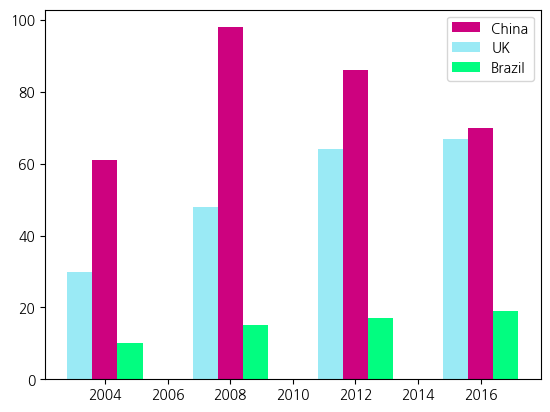

In [44]:
plt.bar(home_ground_China_DF['Year'],home_ground_China_DF['Real_Medal'], color='#cd027f', label = 'China')
plt.bar(home_ground_UK_DF['Year']-0.8,home_ground_UK_DF['Real_Medal'],  color='#9aeaf5', label = 'UK')
plt.bar(home_ground_Brazil_DF['Year']+0.8,home_ground_Brazil_DF['Real_Medal'], color='#02fd80', label = 'Brazil')

plt.legend()


In [45]:
# medal_by_country_total.to_csv('./medal_by_country_total.csv')

In [46]:
# medal_by_country.to_csv('./final_Medal_GSB.csv')